In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df_bivariate_analysis=df

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
##convert 'TotalCharges' column from object to float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df['TotalCharges'].dtype

dtype('float64')

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.loc[df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
## since data available is more than 7000, you can ignore the 11 observations having missing 'TotalCharges'
df.dropna(how='any',subset=['TotalCharges'],inplace=True)

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.shape

(7032, 21)

In [16]:
##To delete duplicates based on unique 'CustomerID'
df.duplicated(subset=['customerID']).sum()

0

In [17]:
##check whether data is balanced or imbalanced
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Number of Churned/Not Churned customers')

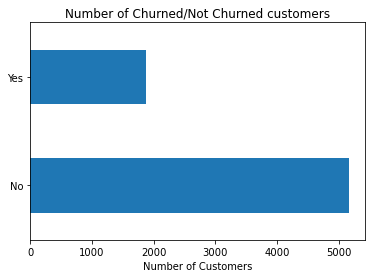

In [18]:
df['Churn'].value_counts().plot(kind='barh', figsize=(6,4))
plt.xlabel("Number of Customers")
plt.title("Number of Churned/Not Churned customers")

In [19]:
##From below, it can be seen that data is imbalanced with only 26.5% data having churned customers.
(df['Churn'].value_counts()/len(df['Churn']))*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [20]:
## Create bins based on Tenure. bins of yearly tenure is good.
df['tenure'].max()

72

In [21]:
tenure_b=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
df['tenure_bins']=pd.cut(df.tenure,range(1,80,12),right=False,labels=tenure_b)
df['tenure_bins'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_bins, dtype: int64

In [22]:
##Drop the unnecessary columns
df.drop(["customerID","tenure"],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


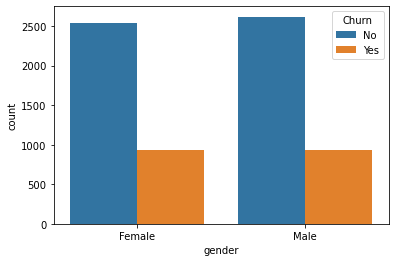

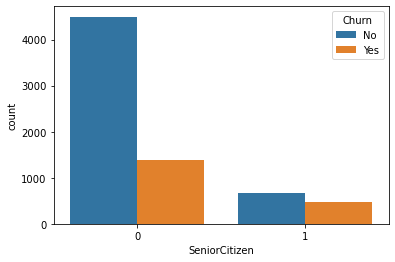

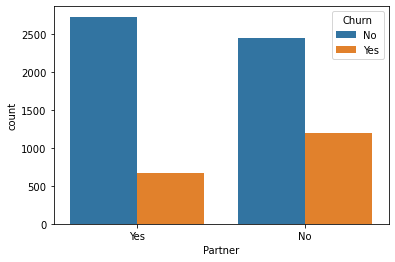

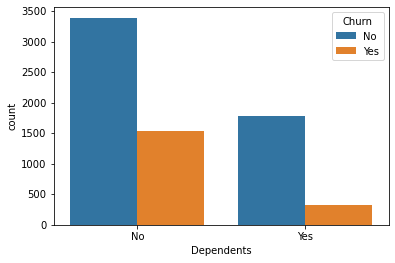

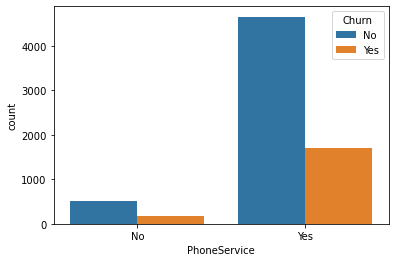

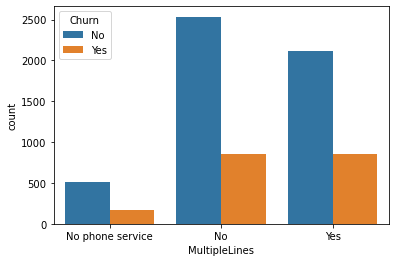

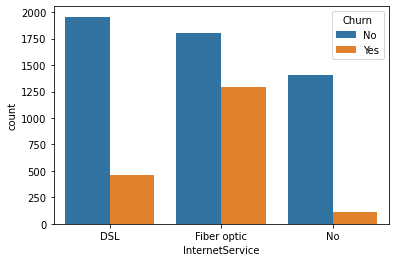

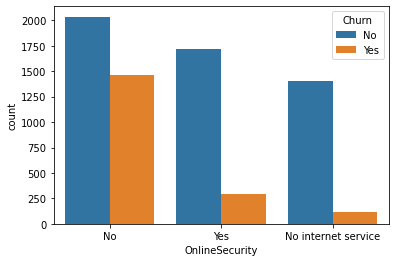

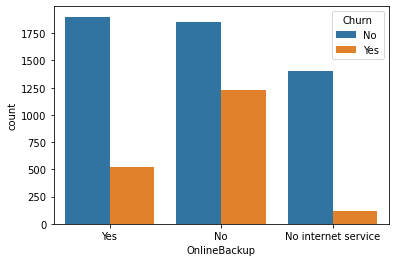

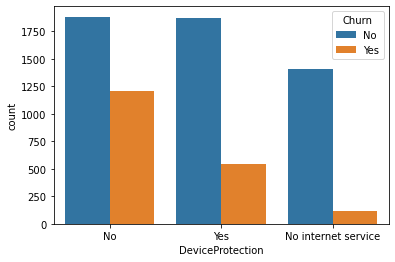

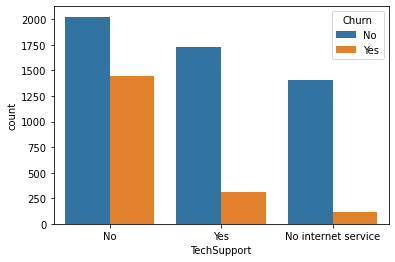

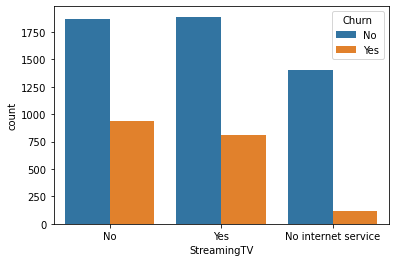

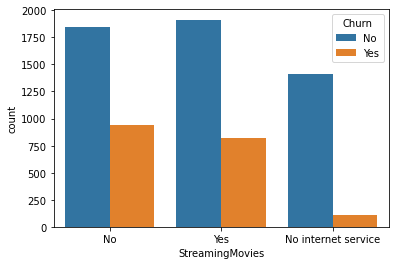

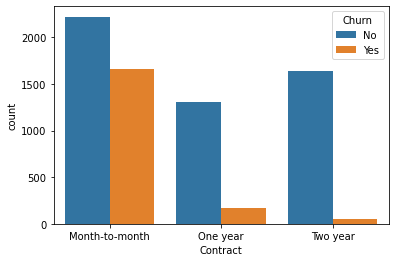

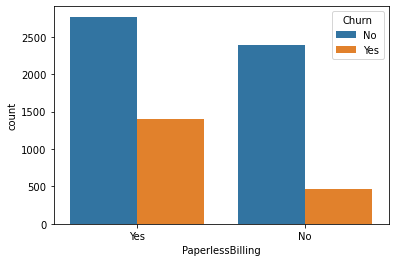

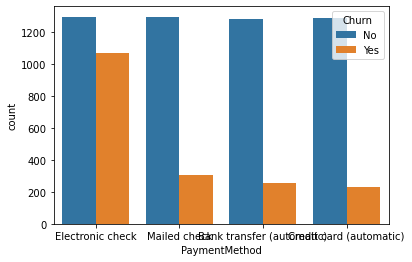

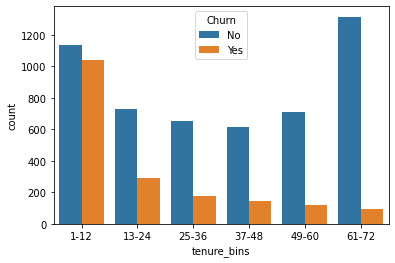

In [23]:
## Start plotting Univariate, Bivariate analysis
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

In [24]:
# Now convert the dependent variable "Churn" from categorical to numerical i.e., Yes as 1 and No as 0
df['Churn']=np.where(df['Churn']=='Yes',1,0)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [26]:
##Convert Categorical variables to numerical variables
df=pd.get_dummies(df)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bins_1-12,tenure_bins_13-24,tenure_bins_25-36,tenure_bins_37-48,tenure_bins_49-60,tenure_bins_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


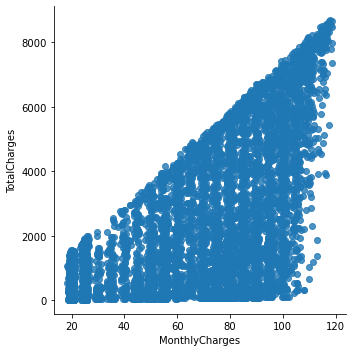

In [27]:
## Since 'MonthlyCharges' and 'TotalCharges' are directly proportional, a regression showing plot is best and is shown by lmplot
sns.lmplot(data=df,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

Text(0.5, 1.0, 'Monthly Chrages for Churn')

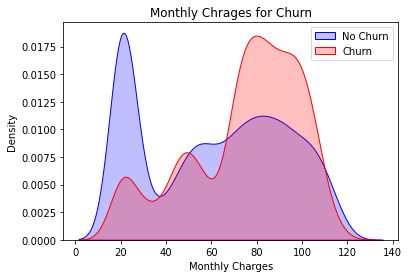

In [28]:
P1 =sns.kdeplot(df.MonthlyCharges[df.Churn==0],color='blue',shade=True)
P1 =sns.kdeplot(df.MonthlyCharges[df.Churn==1],color='red',shade=True, ax=P1)
P1.legend(['No Churn','Churn'],loc=0)
P1.set_xlabel("Monthly Charges")
P1.set_ylabel("Density")
P1.set_title("Monthly Chrages for Churn")

Text(0.5, 1.0, 'Total Chrages for Churn')

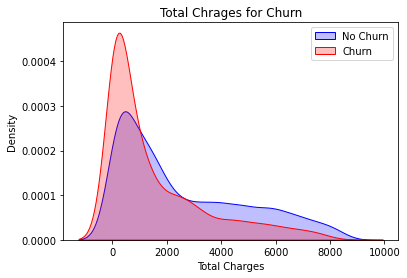

In [29]:
P2 =sns.kdeplot(df.TotalCharges[df.Churn==0],color='blue',shade=True)
P2 =sns.kdeplot(df.TotalCharges[df.Churn==1],color='red',shade=True, ax=P2)
P2.legend(['No Churn','Churn'],loc=0)
P2.set_xlabel("Total Charges")
P2.set_ylabel("Density")
P2.set_title("Total Chrages for Churn")

In [30]:
## Observation : Churn is high when Total Charge is low
# This alone doesn't show the clear picture and we need to combine Tenure, Monthly Charge, Total Charge to get the clear pic.
# Because as per this pic, higher Monthly Charge with lower tenure results in Lower Total Charge too.

<AxesSubplot:>

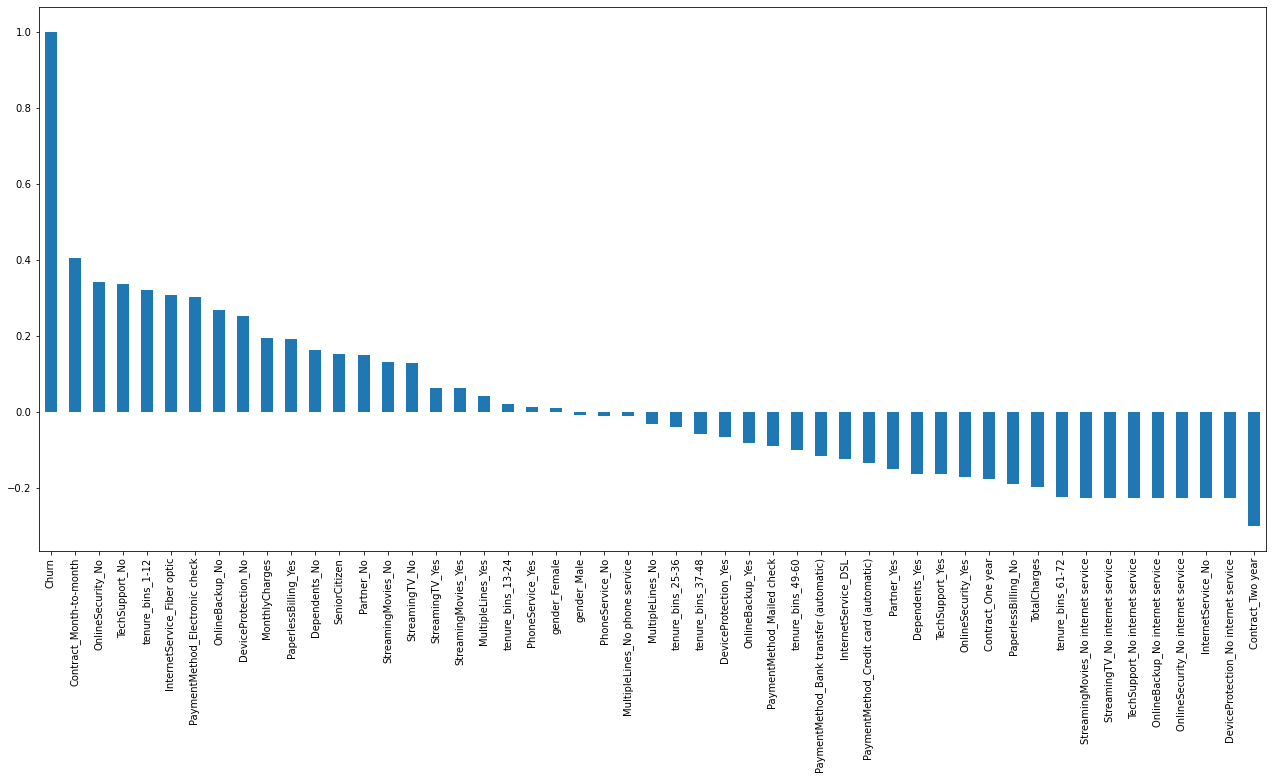

In [31]:
## Build a correlation plot of all features relative to Churn.
P3=df.corr()['Churn'].sort_values(ascending=False)
plt.figure(figsize=(22,10))
P3.plot(kind='bar')

In [32]:
## You can visualize that left side variables on x-axis have high churn rate and those on right side have low churn rate and those on middle doesn't really affect the churn rate.


<AxesSubplot:>

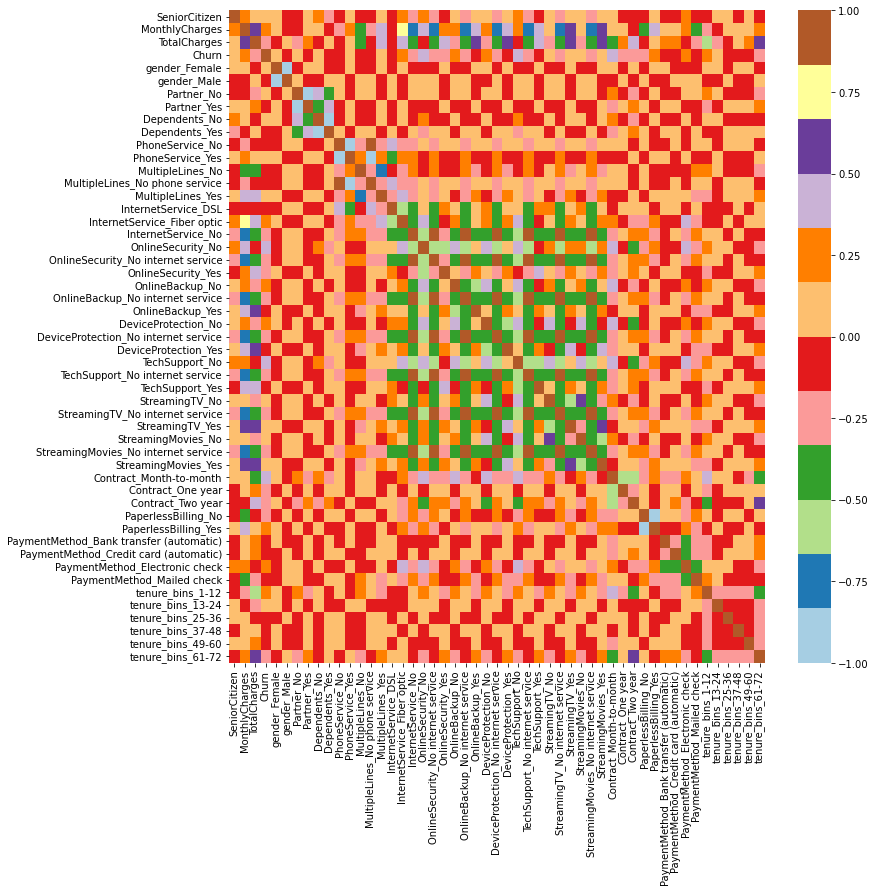

In [33]:
## Visualize the above in heatmap too.
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='Paired')

In [34]:
## Now check for Bivariate Analysis

In [35]:
df_0 = df_bivariate_analysis.loc[df_bivariate_analysis.Churn==0]
df_1 = df_bivariate_analysis.loc[df_bivariate_analysis.Churn==1]

In [36]:
def biplot(dframe,title,col,hue=None):
    
    plt.rcParams["axes.labelsize"]=22
    plt.rcParams["axes.titlesize"]=24
    plt.rcParams["axes.titlepad"]=28
    
    fig,ax=plt.subplots()
    fig.set_size_inches(12,8)
    ax = sns.countplot(data=dframe,x=col,order=dframe[col].value_counts().index,hue=hue,palette='bright')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yscale("log")
    plt.show()

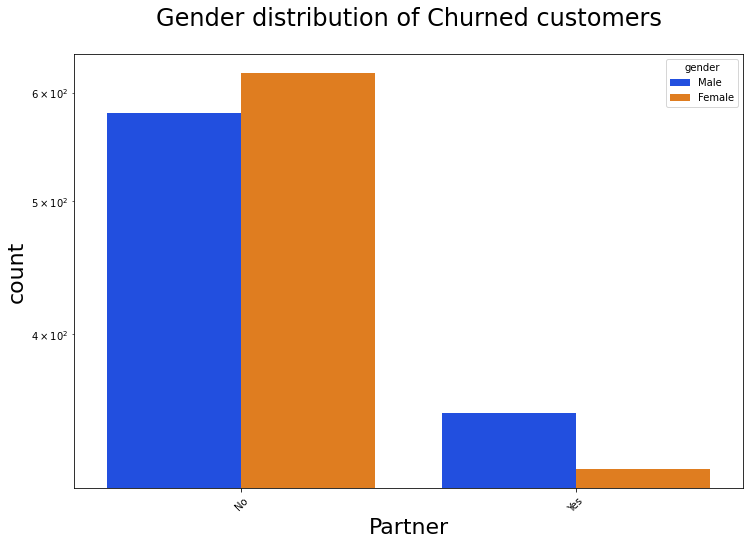

In [37]:
biplot(dframe=df_1,title="Gender distribution of Churned customers",col="Partner",hue='gender')

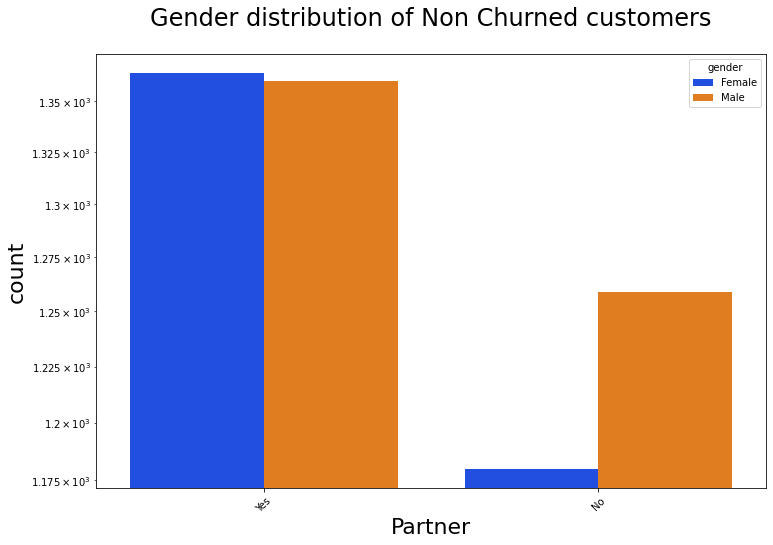

In [38]:
biplot(dframe=df_0,title="Gender distribution of Non Churned customers",col="Partner",hue='gender')

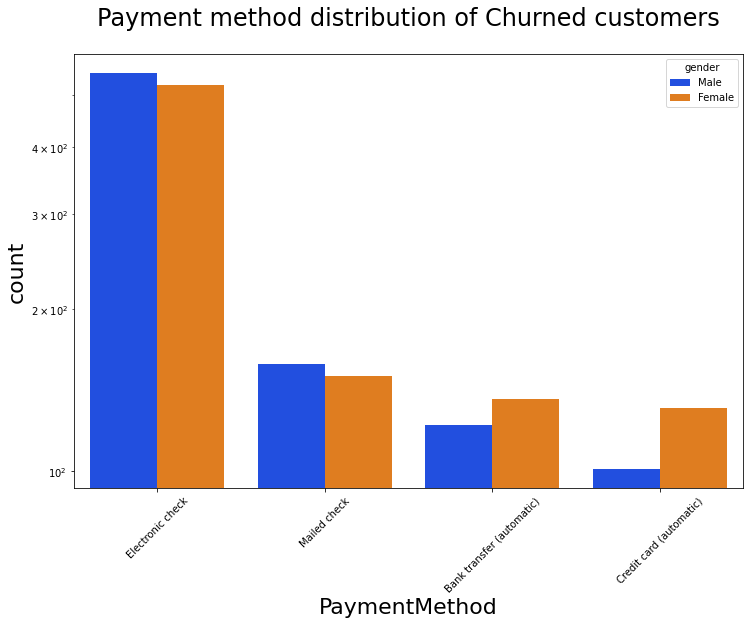

In [39]:
biplot(dframe=df_1,title="Payment method distribution of Churned customers",col="PaymentMethod",hue='gender')

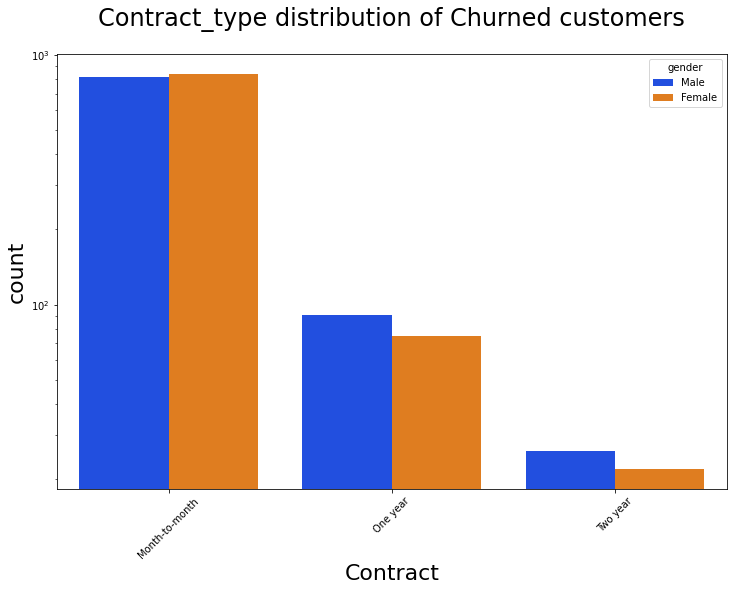

In [40]:
biplot(dframe=df_1,title="Contract_type distribution of Churned customers",col="Contract",hue='gender')

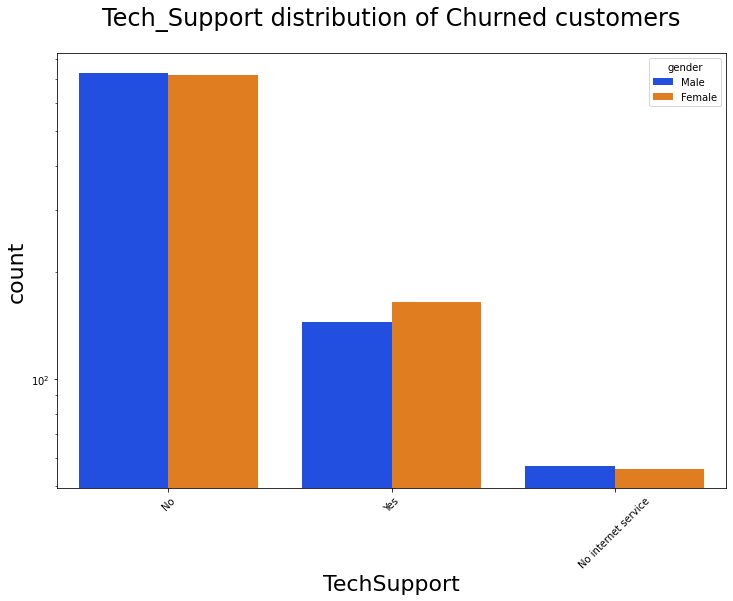

In [41]:
biplot(dframe=df_1,title="Tech_Support distribution of Churned customers",col="TechSupport",hue='gender')


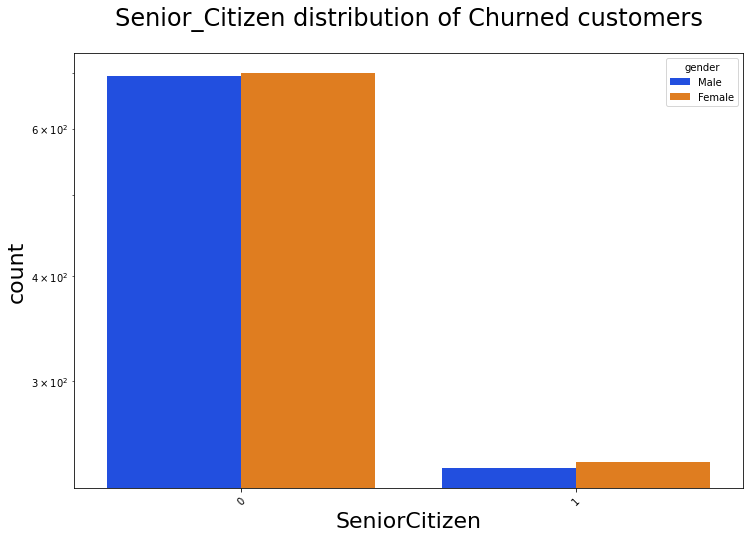

In [42]:
biplot(dframe=df_1,title="Senior_Citizen distribution of Churned customers",col="SeniorCitizen",hue='gender')

In [43]:
##Observations:
#Electronic check medium customers are churned maximum
#Monthly contract type customers are more likely to churn as they don't have any long term contracts
#No Tech Support category are likely to churn
#Non Senior citizens are high churners

In [44]:
# With the above observations now build the model and evaluate the same

In [46]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [47]:
## Define independent and dependent variables
X=df.drop(['Churn'],axis=1)
y=df['Churn']

In [48]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [49]:
model=DecisionTreeClassifier(criterion = "gini",random_state = 200,max_depth=8, min_samples_leaf=8)

In [50]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, random_state=200)

In [51]:
y_prediction=model.predict(X_test)
y_prediction

array([1, 0, 0, ..., 0, 0, 0])

In [52]:
model.score(X_test,y_test)

0.7725657427149965

In [53]:
print(classification_report(y_test, y_prediction,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1022
           1       0.60      0.50      0.55       385

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



In [54]:
## Since data is imbalanced, don't consider 'accuracy' which is low. 
#Also, precision, recall, f1_score is also low. So, do upsampling of minority data using SMOTEENN

In [55]:
model_new = SMOTE()

In [56]:
X_new,y_new = model_new.fit_resample(X,y)

In [57]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_new, y_new,test_size=0.2)

In [58]:
model_smote=DecisionTreeClassifier(criterion = "gini",random_state = 200,max_depth=8, min_samples_leaf=8)

In [59]:
model_smote.fit(X_train1,y_train1)
y_smote_prediction=model_smote.predict(X_test1)
model_smote_scr=model_smote.score(X_test1,y_test1)
print(model_smote_scr)
print(classification_report(y_test1, y_smote_prediction,labels=[0,1]))

0.8272023233301065
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1028
           1       0.82      0.84      0.83      1038

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [60]:
print(metrics.confusion_matrix(y_test1,y_smote_prediction))

[[837 191]
 [166 872]]


In [61]:
## Apply Random Forest Classifier now for imbalanced data

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 200,max_depth=8, min_samples_leaf=8)

In [64]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=200)

In [65]:
y_rf_prediction=model_rf.predict(X_test)

In [66]:
model_rf.score(X_test,y_test)

0.7853589196872779

In [67]:
print(classification_report(y_test, y_rf_prediction, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1022
           1       0.65      0.48      0.55       385

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.77      1407



In [68]:
## Balance the data and apply Random forest again

In [69]:
model_rf_new = SMOTE()

In [70]:
X_rf_new,y_rf_new = model_rf_new.fit_resample(X, y)

In [71]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_rf_new, y_rf_new,test_size=0.2)

In [72]:
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 200,max_depth=8, min_samples_leaf=8)

In [73]:
model_rf_smote.fit(X_train2,y_train2)
y_smote_rf_prediction = model_rf_smote.predict(X_test2)
model_rf_score = model_rf_smote.score(X_test2, y_test2)
print(model_rf_score)
print(metrics.classification_report(y_test2, y_smote_rf_prediction))

0.8373668925459826
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1026
           1       0.81      0.88      0.85      1040

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [74]:
print(metrics.confusion_matrix(y_test2, y_smote_rf_prediction))

[[812 214]
 [122 918]]


In [75]:
## Here it can be observed that Random Forest gives good result than Decision tree and hence, selected the same for deployment.